In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [17]:
def load_data(dataset):
    (x_train, y_train), (x_test, y_test) = dataset.load_data()
    x_train = tf.keras.utils.normalize(x_train, axis=1)
    x_test = tf.keras.utils.normalize(x_test, axis=1)
    return (x_train, y_train), (x_test, y_test)

In [18]:
def create_model(x_train, y_train, x_test, y_test, model_path):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    model.fit(x_train, y_train, epochs=3)

    value_loss, value_accuracy = model.evaluate(x_test, y_test)
    print(f"Model Losses: {value_loss}")
    print(f"Model Accuracy: {value_accuracy}")

    model.save(model_path)

In [19]:
def load_model_and_predict_number_nine(model_path, x_test, y_test):
    model = tf.keras.models.load_model(model_path)

    # Encontrar um índice de uma imagem do número 9 no dataset de teste
    number_nine_index = np.where(y_test == 9)[0][0]
    number_nine_image = x_test[number_nine_index]

    # Fazer a predição
    prediction = model.predict([number_nine_image.reshape(1, 28, 28)])
    predicted_label = np.argmax(prediction[0])

    # Mostrar a imagem e a predição
    plt.imshow(number_nine_image, cmap=plt.cm.binary)
    plt.title(f'Predicted Label: {predicted_label}')
    plt.show()

In [20]:
def main():
    mnist = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = load_data(mnist)

    model_path = 'modelo.model.h5'

    create_model(x_train, y_train, x_test, y_test, model_path)

    load_model_and_predict_number_nine(model_path, x_test, y_test)

Epoch 1/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2593 - accuracy: 0.9244
Epoch 2/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1079 - accuracy: 0.9664
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.9733
Model Losses: 0.09088362753391266
Model Accuracy: 0.9732999801635742


1/1 [==============================] - 0s 61ms/step


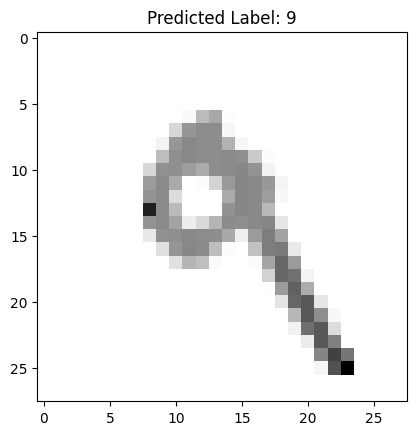

In [22]:
main()